**Proyecto Equipo D**

![An image](https://media.timtul.com/media/users/hackaboss_300_20211202185733.png)

**Proyecto II Grupo D** del curso de Ciencia de Datos de Hack'a'Boss **01 Julio 2024** (DSB10RT).

Seleccionar uno de estos enfoques para el proyecto y definir el problema

Para este segundo proyecto vamos a poder elegir entre:

**Machine Learning**
*   Aprendizaje supervisado.
*   Aprendizaje no supervisado.

**NLP**
*   Análisis de Texto.
*   Modelos predictivos.
*   Análisis de Sentimiento.

**Algoritmos Genéticos**

**Recomendadores.**


# 01. Definición del problema

Partimos por la definición del problema o el objetivo del proyecto.

¿Qué variable queremos predecir?

¿Es una regresión o una clasificación?

¿Qué datos son necesarios para predecir esa variable?

¿Cómo consigo esos datos?

# 02. Recopilación de Datos

Una de las etapas más difíciles de todo proyecto, para esta etapa podemos decidir usar herramientas del los módulos pasados, como API o Web Scraping.

Podemos usar las siguientes fuentes para encontrar los datos que necesitamos.

Fuentes:

*  UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php

*  Kaggle: https://www.kaggle.com/datasets

*  Google Dataset Search: https://datasetsearch.research.google.com/

*  Microsoft Open Data: https://msropendata.com/

*  European Data: https://data.europa.eu/en

*  Awesome Data: https://github.com/awesomedata/awesome-public-datasets

*  Amazon Web Services: https://registry.opendata.aws/

##################

####################

El data set seleccionado fue descargado del siguiente enlace:

https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Behavioral-Risk-Factor-Surveillance-System-BRFSS-N/ikwk-8git/data

# 03. Exploratory Data Analysis (EDA) y Procesamiento de Datos

Para seguir con el proyecto es necesario conocer los datos, para esto vamos a utilizar las herramientas de EDA, es decir, visualizaciones y estadística.

También es necesario procesar los datos antes de implementarlos en el modelo, esto comprende:

*   NaN's.

*   Outliers.

*   Variables no numéricas.

*   Dimensionalidad.

*   Normalización de Datos.

Esta parte del proyecto se debe adaptar a los datos.



## Importar Librerias Requeridas

In [1]:
# !pip install scikit-learn
# !pip install category_encoders
# !pip install unidecode
# !pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import sqrt
from unidecode import unidecode

# Modelo
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Herramienta Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

# Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Validaciones
from sklearn.model_selection import KFold, LeaveOneOut

# Importar herramientas de prepocesamiento necesarias
...

Ellipsis

## Exploración y limpieza Inicial del DataFrame

In [3]:
df = pd.read_csv("Data/heart_2020_cleaned.csv")

In [4]:
## Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

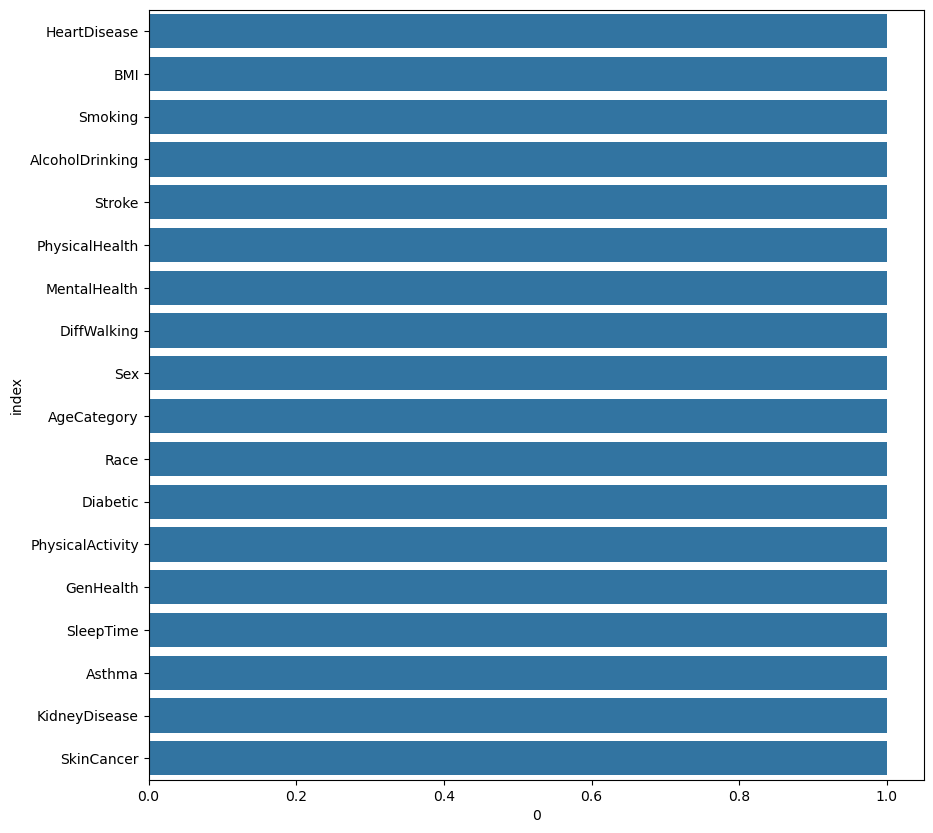

In [6]:
plt.figure(figsize=(10,10))
sns.barplot((pd.DataFrame(df.count())/df.shape[0]).reset_index(), x=0, y='index')
plt.show()

In [7]:
stats = df.describe()

stats

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
# Funcion para limpiar nombres de columnas de espacios y caracteres especiales

def limpiar_nomb_colums(nombre_columna):
    nombre_columna = nombre_columna.strip()
    nombre_columna = nombre_columna.replace(' ', '_')
    nombre_columna = unidecode(nombre_columna)
    return nombre_columna


In [9]:
# Funcion para limpiar los espacios en blanco al inicio y al final

def limpiar_espacios_blancos(df):
  for columna in df.columns:
    df[columna] = df[columna].str.strip()

In [10]:
# Funcion para cambiar valores None por NaN

def llenar_Nan(df):
  for columna in df.columns:
    df[columna] = df[columna].fillna(np.NaN)

In [11]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
## llenar_Nan(df)
## df.columns = df.columns.map(limpiar_nomb_colums)
## limpiar_espacios_blancos(df)

In [13]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Columna: HeartDisease

In [14]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['HeartDisease'].nunique()

2

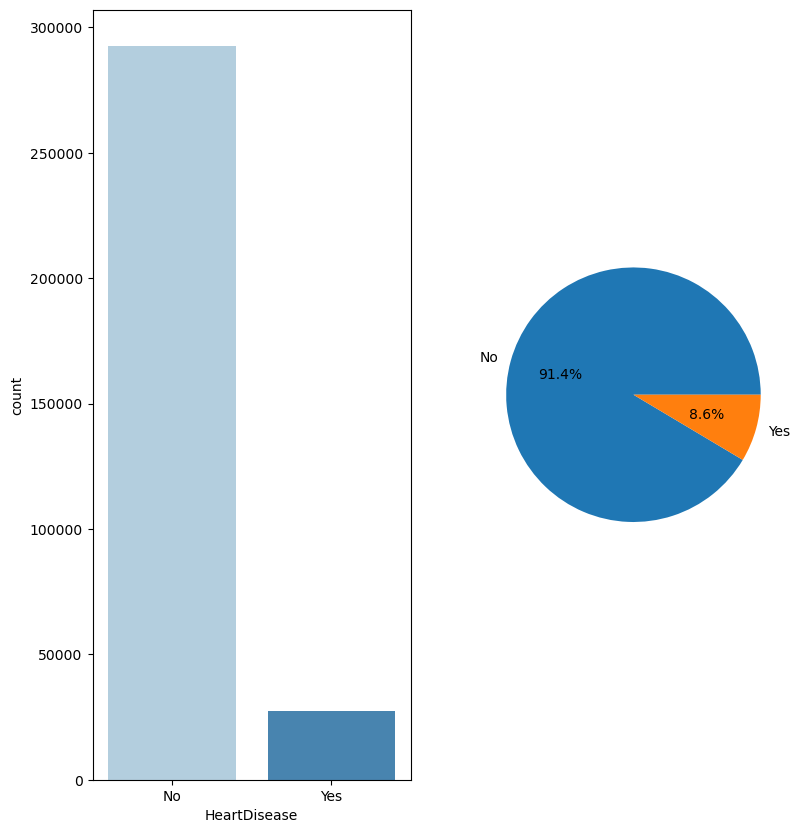

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

sns.countplot(x='HeartDisease', palette='Blues', hue='HeartDisease', data=df, ax=axes[0])
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', labels=df['HeartDisease'].unique())
plt.subplots_adjust(left=0.2)
plt.show()

## Columna: BMI

In [17]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [18]:
df['BMI'].nunique()

3604

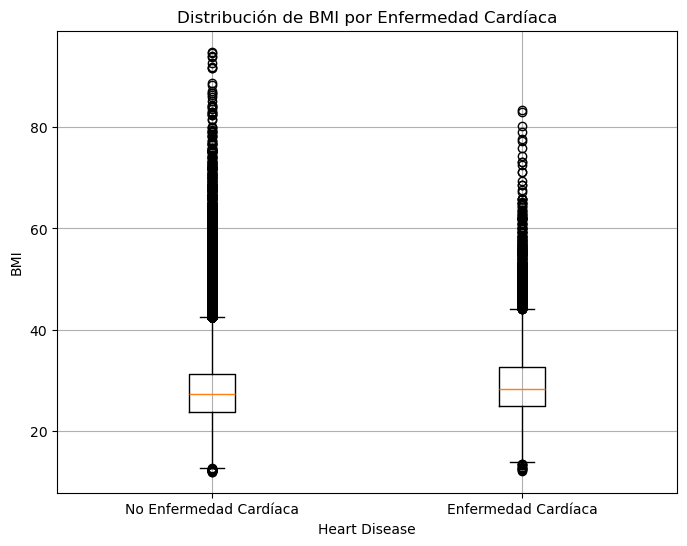

In [19]:
relacion_bmi_no_disease = df[df['HeartDisease'] == 'No']['BMI']
relacion_bmi_disease = df[df['HeartDisease'] == 'Yes']['BMI']
plt.figure(figsize = (8, 6))
plt.boxplot([relacion_bmi_no_disease, relacion_bmi_disease],
            labels = ['No Enfermedad Cardíaca', 'Enfermedad Cardíaca'])
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.title('Distribución de BMI por Enfermedad Cardíaca')
plt.grid(True)
plt.show()

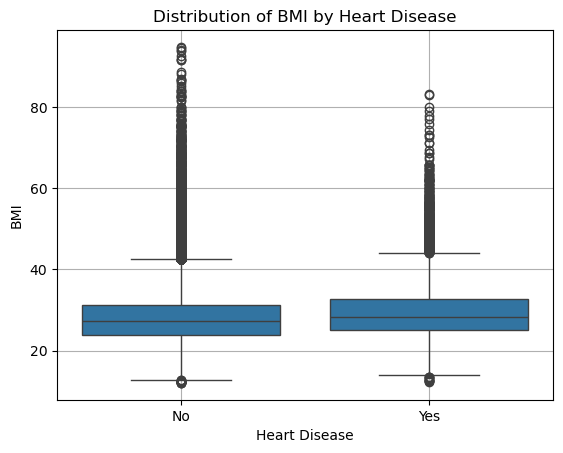

In [20]:
#plt.boxplot(df["BMI"], by=df["HeartDisease"], vert=False)
sns.boxplot(data = df, x = "HeartDisease", y = "BMI")
plt.xlabel("Heart Disease")
plt.ylabel("BMI")
plt.title("Distribution of BMI by Heart Disease")
plt.grid(True)
plt.show()

## Columna: Smoking

In [21]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['Smoking'].nunique()

2

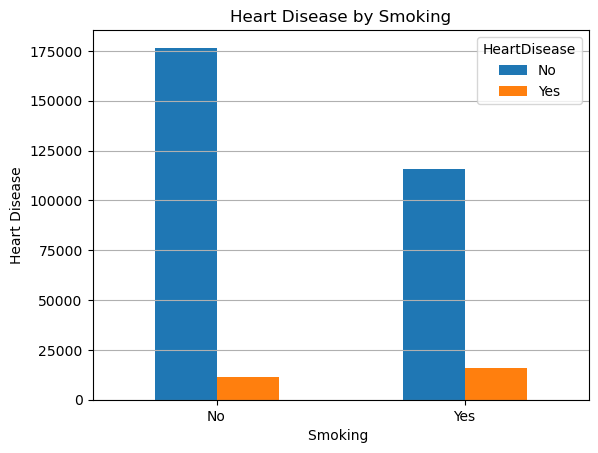

In [23]:
SMxHD = df.groupby(["Smoking", "HeartDisease"])["HeartDisease"].count().unstack()
SMxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Smoking ")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Smoking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: AlcoholDrinking

In [24]:
df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['AlcoholDrinking'].nunique()

2

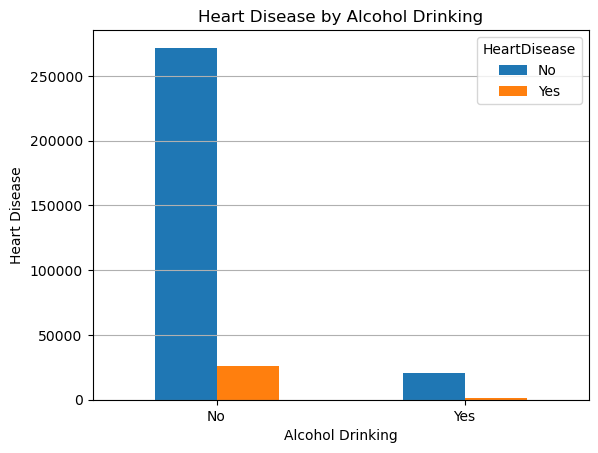

In [26]:
ADxHD = df.groupby(["AlcoholDrinking", "HeartDisease"])["HeartDisease"].count().unstack()
ADxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Alcohol Drinking")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Alcohol Drinking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: Stroke

In [27]:
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df['Stroke'].nunique()

2

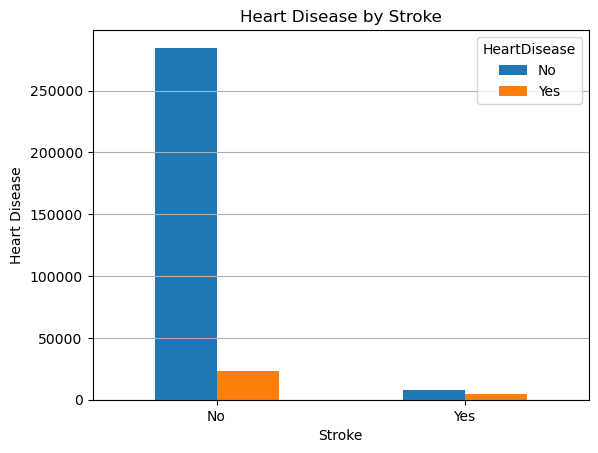

In [29]:
STxHD = df.groupby(["Stroke", "HeartDisease"])["HeartDisease"].count().unstack()
STxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Stroke")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Stroke")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: PhysicalHealth

In [30]:
# Rosalia

## Columna: MentalHealth

In [31]:
# Rosalia

## Columna: DiffWalking

In [32]:
# Rosalia

## Columna: Sex

In [33]:
# Rosalia

## Columna: AgeCategory

In [34]:
# 2024-07-02 AGM
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [35]:
df['AgeCategory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: AgeCategory
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [36]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['AgeCategory']])
df_age_category = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['AgeCategory']))
df_age_category.sample(5)

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
203602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242525,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
df_age_category = df_age_category.astype(int)
df_age_category.dtypes

AgeCategory_18-24          int64
AgeCategory_25-29          int64
AgeCategory_30-34          int64
AgeCategory_35-39          int64
AgeCategory_40-44          int64
AgeCategory_45-49          int64
AgeCategory_50-54          int64
AgeCategory_55-59          int64
AgeCategory_60-64          int64
AgeCategory_65-69          int64
AgeCategory_70-74          int64
AgeCategory_75-79          int64
AgeCategory_80 or older    int64
dtype: object

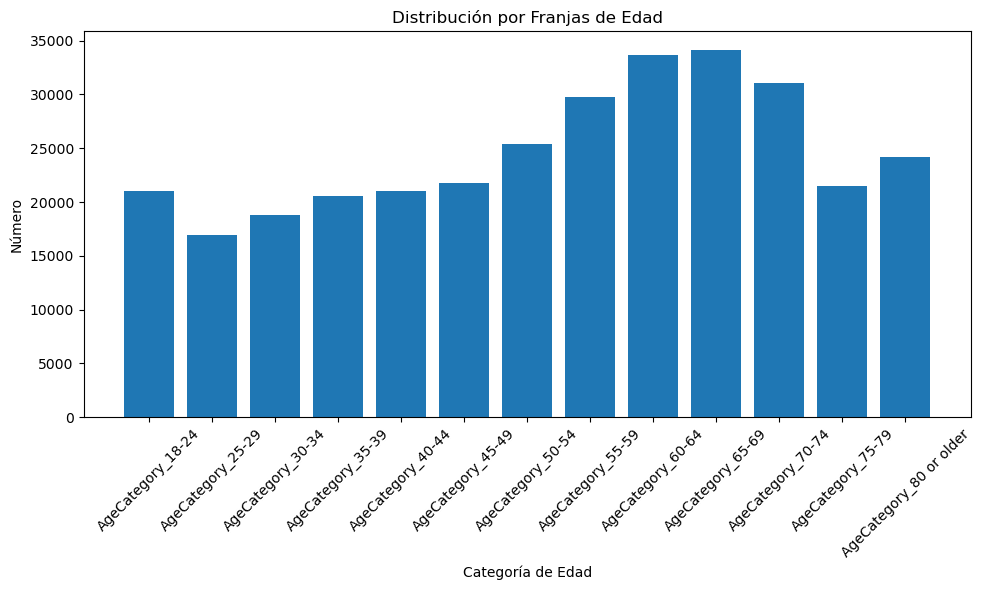

In [38]:
suma_edades = df_age_category.sum(axis = 0)

plt.figure(figsize=(10, 6))
plt.bar(suma_edades.index, suma_edades.values)
plt.title('Distribución por Franjas de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Columna: Race

In [39]:
# 2024-07-02 AGM

df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [40]:
df['Race'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: Race
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [41]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['Race']])
df_race = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['Race']))
df_race.sample(5)

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
226966,0.0,0.0,0.0,0.0,0.0,1.0
73066,0.0,0.0,0.0,0.0,0.0,1.0
149916,0.0,0.0,0.0,0.0,0.0,1.0
176014,0.0,0.0,0.0,1.0,0.0,0.0
158988,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
df_race = df_race.astype(int)
df_race.sample(5)

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
73107,0,0,0,0,0,1
61420,0,1,0,0,0,0
277467,0,0,0,0,0,1
306956,0,0,0,0,0,1
90984,0,0,0,0,0,1


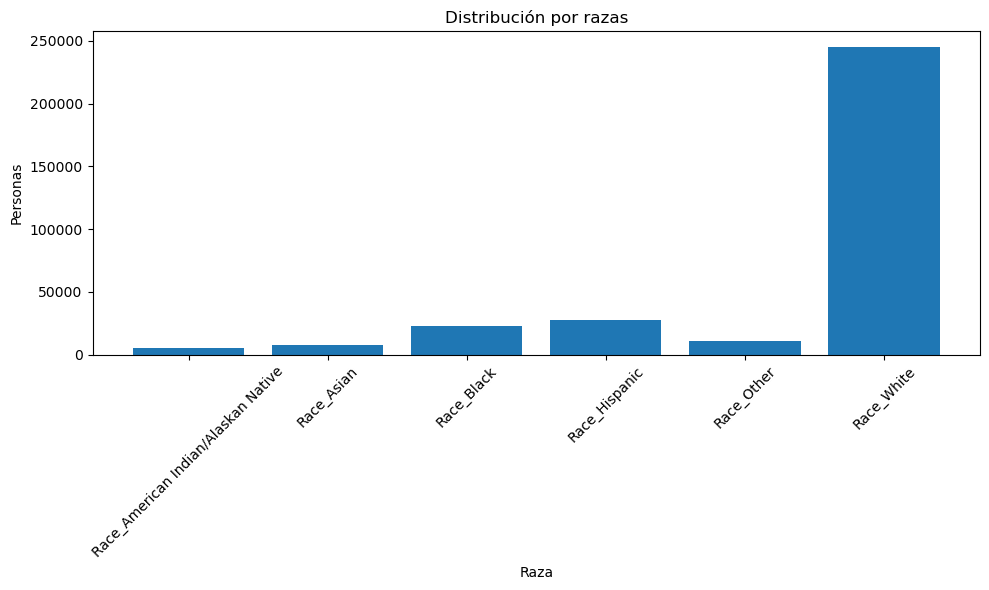

In [43]:
suma_razas = df_race.sum(axis = 0)

plt.figure(figsize = (10, 6))
plt.bar(suma_razas.index, suma_razas.values)
plt.title('Distribución por razas')
plt.xlabel('Raza')
plt.ylabel('Personas')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()


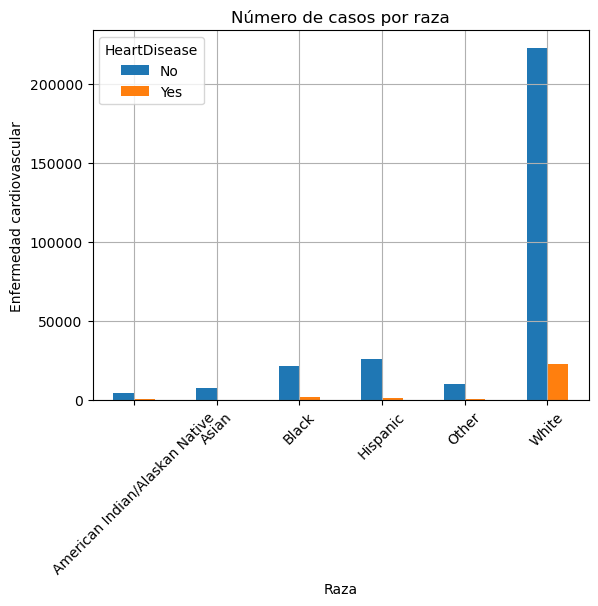

In [44]:
race_vs_hd = df.groupby(['Race', 'HeartDisease'])['HeartDisease'].count().unstack()
race_vs_hd.plot(kind = 'bar', stacked = False)
plt.xlabel('Raza')
plt.ylabel('Enfermedad cardiovascular')
plt.title('Número de casos por raza')
plt.xticks(rotation = 45)
plt.grid(True)

plt.show()

In [45]:
# Experimento con plotly.express https://plotly.com/python/bar-charts/
import plotly.express as px
race_vs_hd = df.groupby(['Race', 'HeartDisease']).size().reset_index(name='Casos')
fig = px.histogram(race_vs_hd, 
                   x = 'Race', 
                   y = 'Casos', 
                   color = 'HeartDisease', 
                   barmode = 'group', 
                   height = 600, 
                   width = 1024,
                   labels = {
                       'Race': 'Raza',
                       'Casos': 'Personas'
                   },
                   title = 'Enfermedad cardiovascular por raza')
fig.show()

## Columna: Diabetic

In [46]:
# 2024-07-03 AGM

df['Diabetic'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: Diabetic
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [47]:
# 2024-07-03 AGM

df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [48]:
# 2024-07-03 AGM

df['Diabetic'] = df['Diabetic'].map({'Yes':1, 'No':0, 'No, borderline diabetes':2, 'Yes (during pregnancy)':3})

df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
259399,No,43.07,No,No,No,0,0,No,Male,50-54,White,1,Yes,Very good,8,No,No,No
78169,No,38.37,No,No,No,2,0,No,Female,55-59,White,0,Yes,Excellent,8,No,No,No
178092,No,27.40,No,No,No,15,30,No,Female,55-59,Black,1,No,Good,8,No,No,No
116091,No,26.63,Yes,No,No,0,0,Yes,Male,55-59,Black,0,Yes,Very good,6,No,No,No
291691,No,37.18,Yes,No,No,0,0,No,Male,70-74,White,1,Yes,Good,7,No,No,No


### Comparativa numérica de la columna de diabetes frente a HeartDisease.


In [100]:
# 2024-07-03 AGM

diabetic_vs_hd = df.groupby(['Diabetic', 'HeartDisease'])['HeartDisease'].count().unstack()
diabetic_vs_hd.head()

HeartDisease,No,Yes
Diabetic,,
0,252134,17519
1,31845,8957
2,5992,789
3,2451,108


### Comparativa gráfica de la columna de diabetes frente a HeartDisease.

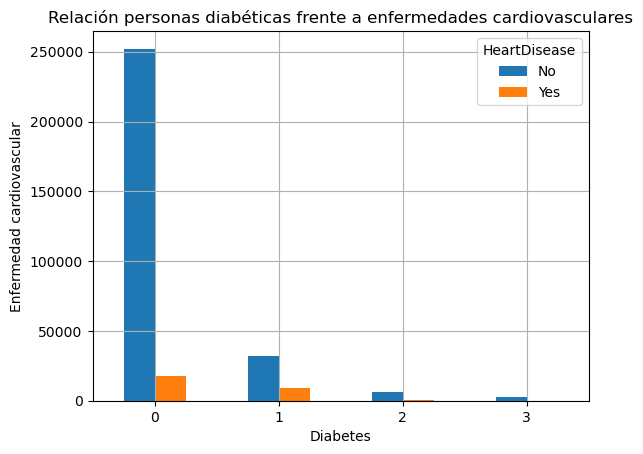

In [101]:
diabetic_vs_hd.plot(kind = 'bar', stacked = False)
plt.xlabel('Diabetes')
plt.ylabel('Enfermedad cardiovascular')
plt.title('Relación personas diabéticas frente a enfermedades cardiovasculares')
plt.xticks(rotation = 0)
plt.grid(True)

plt.show()

### Comparativa gráfica de la columna de diabetes frente a razas.

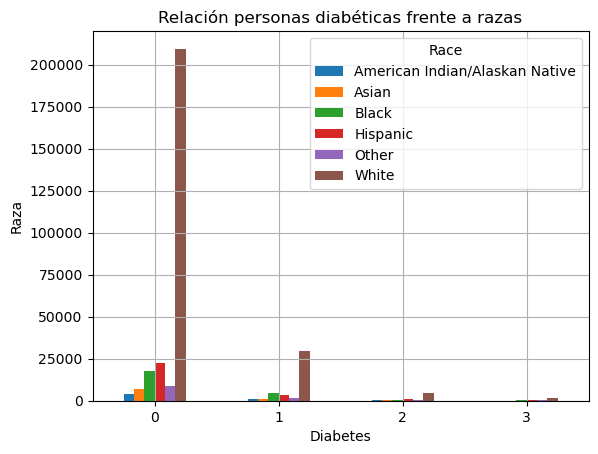

In [96]:
# 2024-07-03 AGM

suma_diabetes = df['Diabetic'].sum(axis = 0)

diabetic_vs_race = df.groupby(['Diabetic', 'Race'])['Diabetic'].count().unstack()
diabetic_vs_race.plot(kind = 'bar', stacked = False)
plt.xlabel('Diabetes')
plt.ylabel('Raza')
plt.title('Relación personas diabéticas frente a razas')
plt.xticks(rotation = 0)
plt.grid(True)

plt.show()

## Columna: PhysicalActivity

In [50]:
# Alexia

## Columna: GenHealth

In [51]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [52]:
df['GenHealth'].nunique()

5

In [53]:
def health_clasification(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == 'Poor':
    return 0
  elif x == 'Fair':
    return 1
  elif x == 'Good':
    return 2
  elif x == 'Very good':
    return 3
  elif x == 'Excellent':
    return 4

In [54]:
df['GenHealth'] = df['GenHealth'].apply(health_clasification)

In [55]:
df['GenHealth'].unique()

array([3, 1, 2, 0, 4])

<Axes: xlabel='HeartDisease', ylabel='GenHealth'>

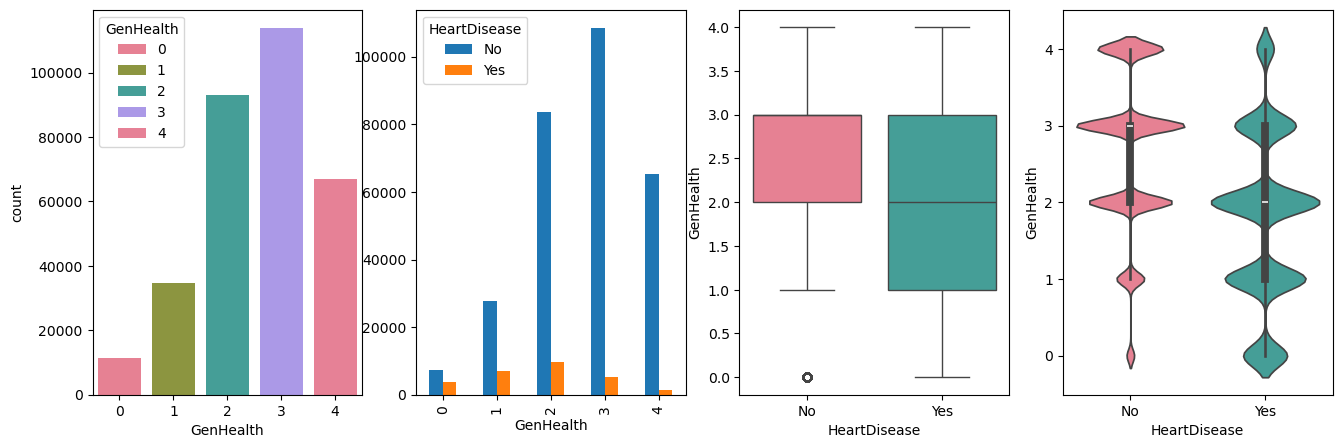

In [56]:
# Graficos 'GenHealth'

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.countplot(x='GenHealth', data=df, hue='GenHealth', palette='husl', ax=axes[0])
df_agrupado = df.groupby(['GenHealth', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.boxplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
sns.violinplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[3])

## Columna: SleepTime

In [57]:
df['SleepTime'].unique()

array([ 5,  7,  8,  6, 12,  4,  9, 10, 15,  3,  2,  1, 16, 18, 14, 20, 11,
       13, 17, 24, 19, 21, 22, 23])

In [58]:
df['SleepTime'].nunique()

24

<Axes: xlabel='HeartDisease', ylabel='SleepTime'>

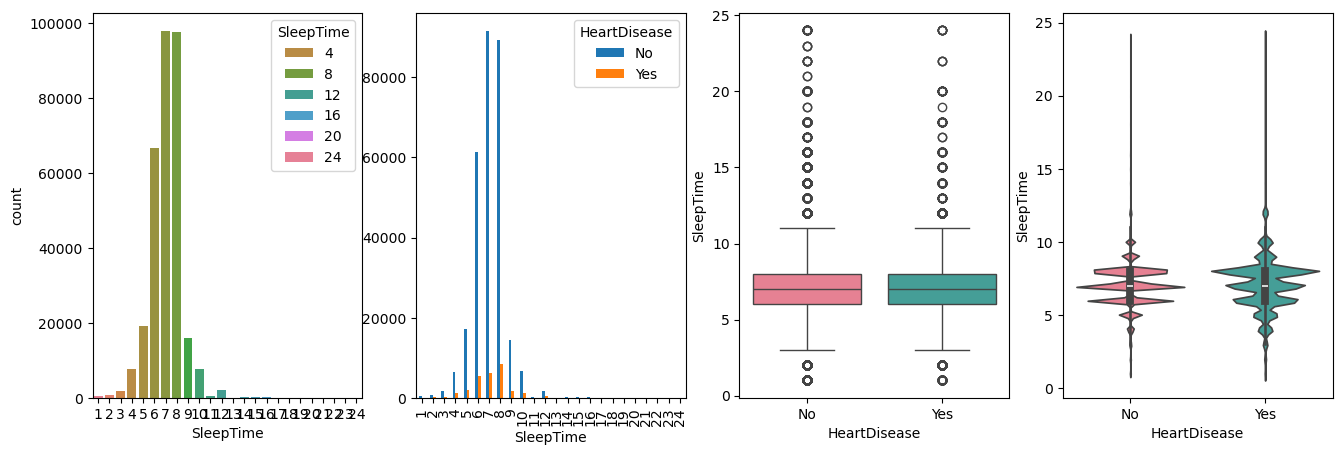

In [59]:
# Graficos 'GenHealth'

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.countplot(x='SleepTime', data=df, hue='SleepTime', palette='husl', ax=axes[0])
df_agrupado = df.groupby(['SleepTime', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.boxplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
sns.violinplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[3])

## Columna: Asthma

In [60]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

## Columna: KidneyDisease

In [61]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

## Columna: SkinCancer

In [62]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

# Exploratory Data Analysis (EDA)

In [63]:
print("Valores únicos para variables categóricas:")
for columna in df.select_dtypes(include = 'object').columns:
    print(f"Columna '{columna}':")
    print(df[columna].value_counts())

Valores únicos para variables categóricas:
Columna 'HeartDisease':
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
Columna 'Smoking':
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
Columna 'AlcoholDrinking':


AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
Columna 'Stroke':
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
Columna 'DiffWalking':
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64
Columna 'Sex':
Sex
Female    167805
Male      151990
Name: count, dtype: int64
Columna 'AgeCategory':
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64
Columna 'Race':
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64
Columna 'PhysicalActivity':
PhysicalActivity
Yes    2479

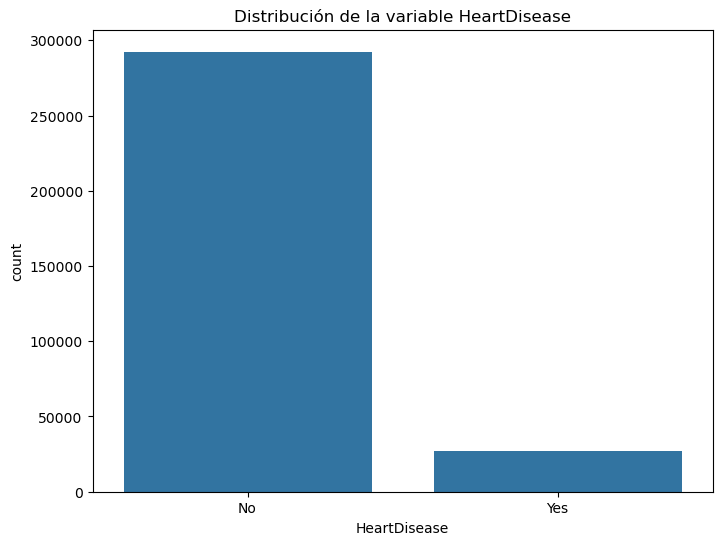

In [64]:
# Distribución de la variable HeartDisease

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.countplot(x = 'HeartDisease', data = df)
plt.title('Distribución de la variable HeartDisease')
plt.show()

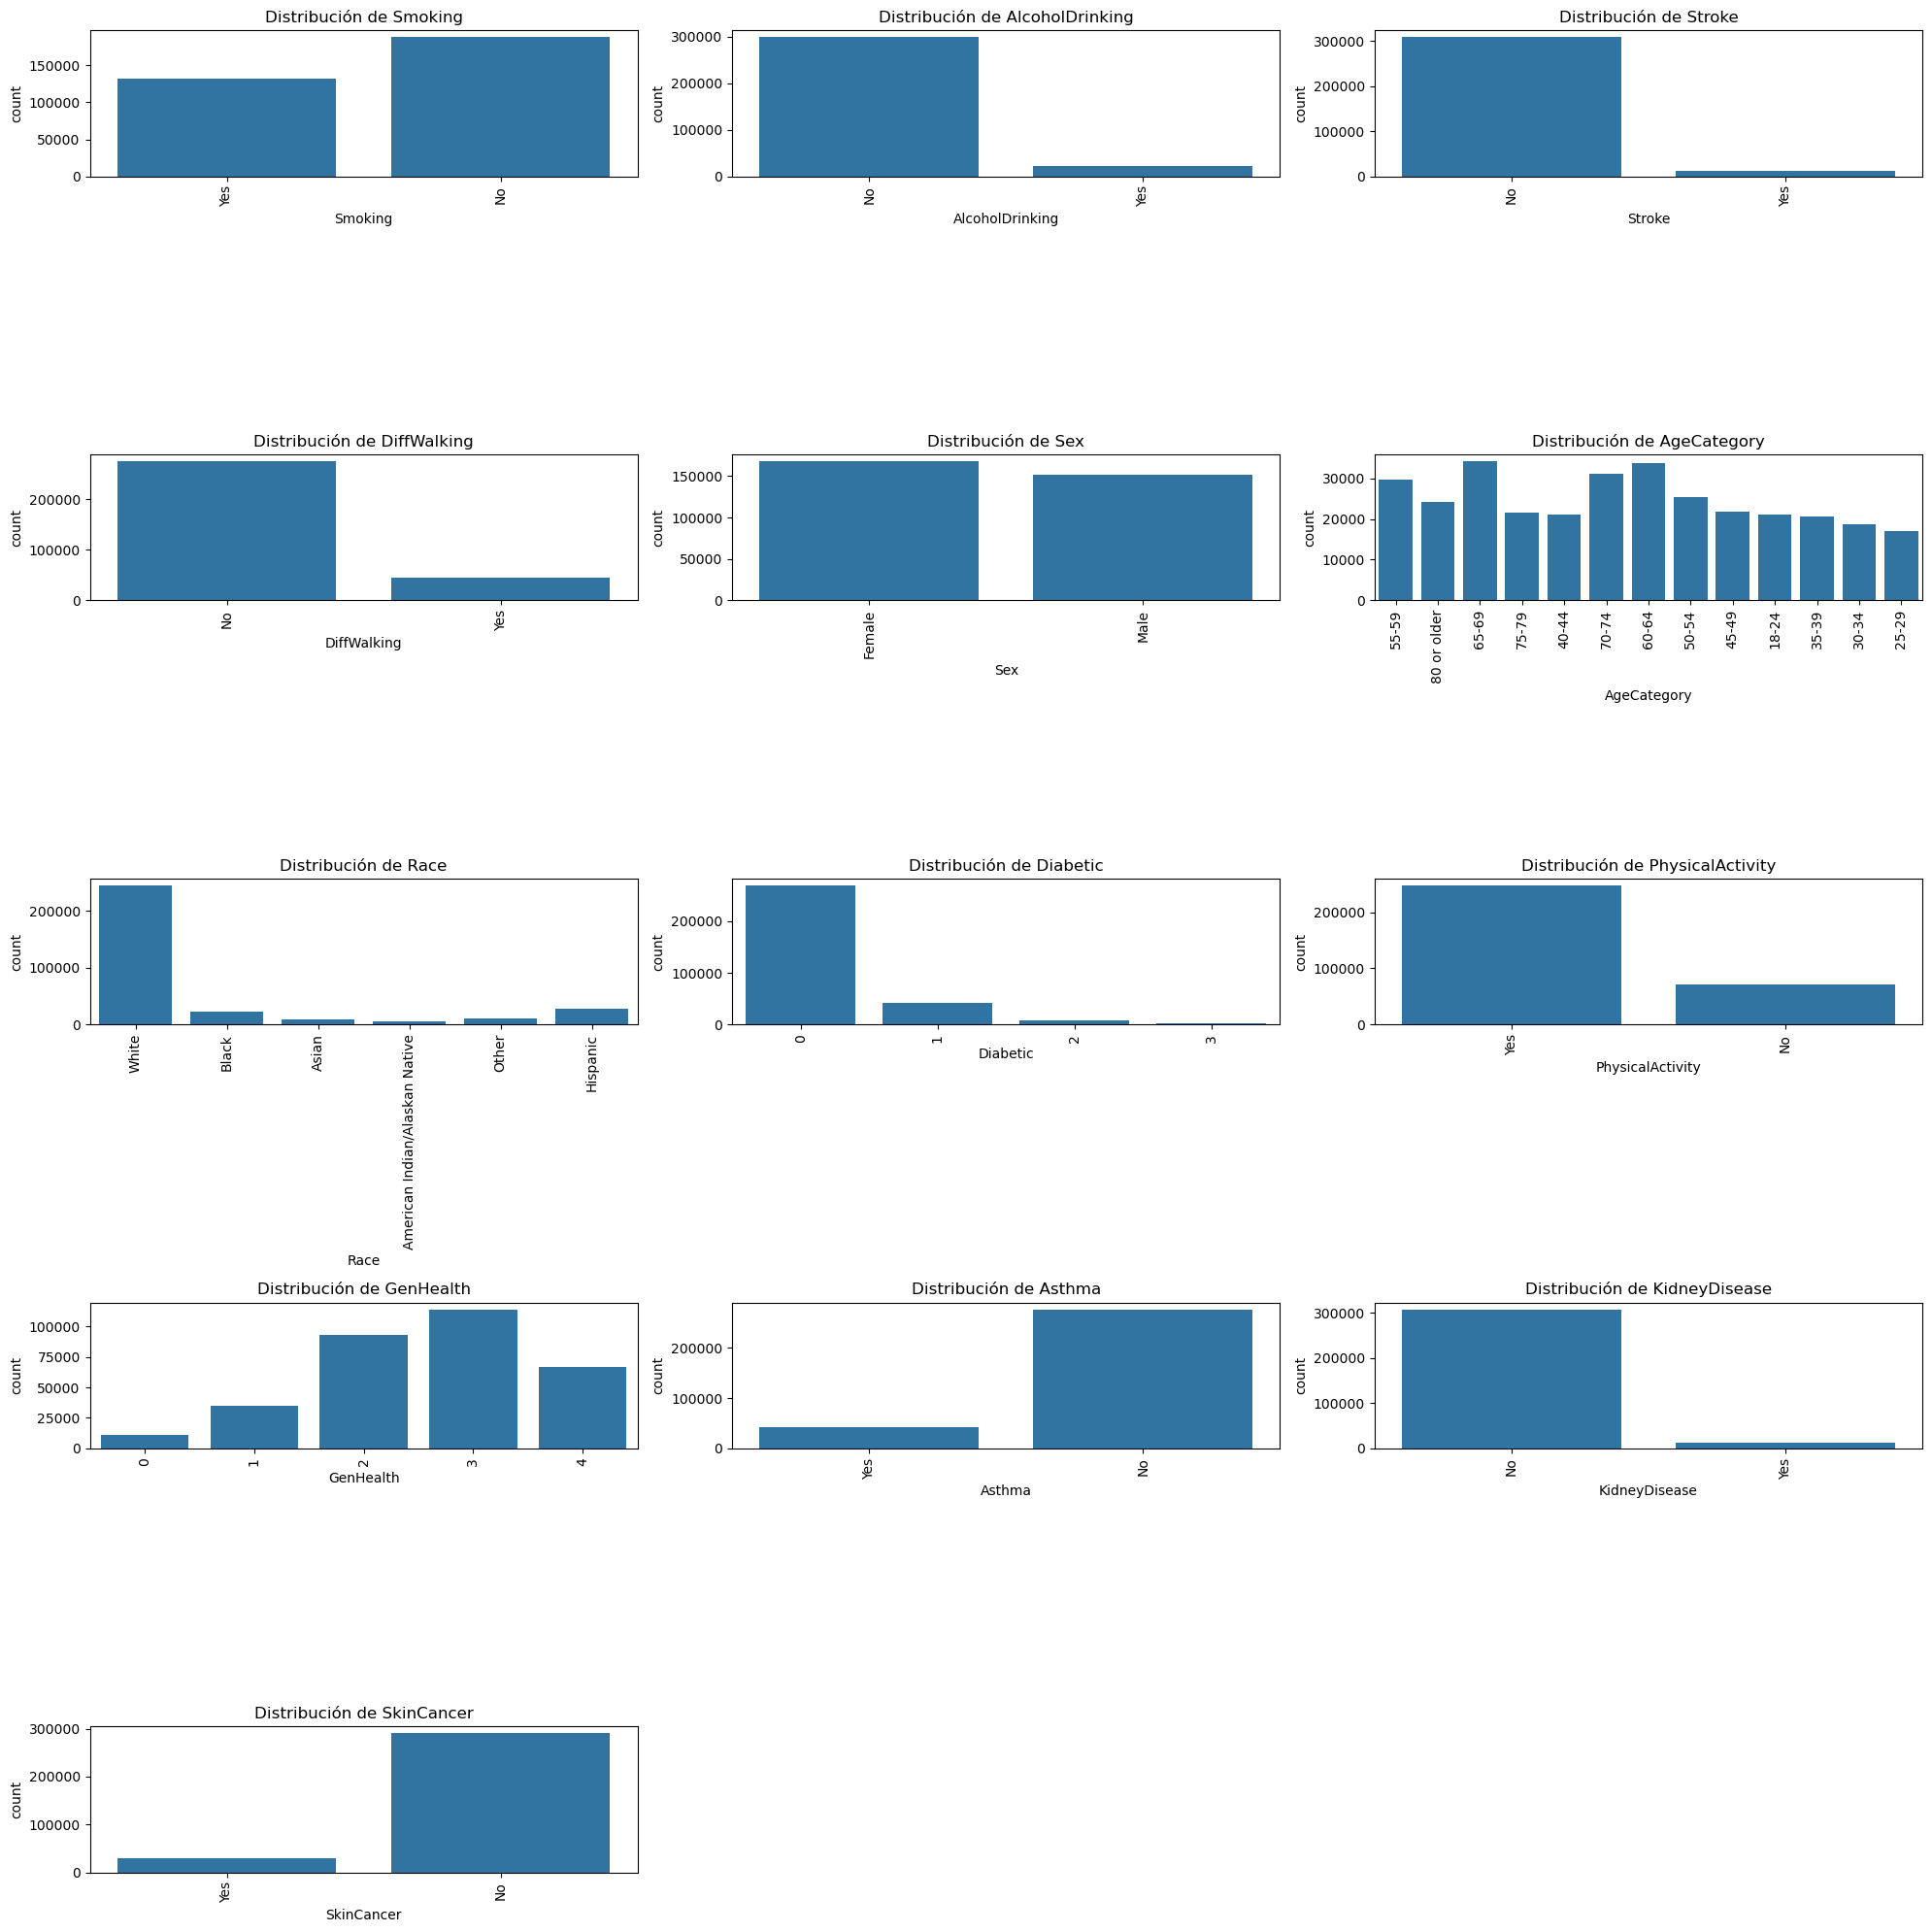

In [65]:
# Distribución de variables categóricas

columnas_categoricas = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

plt.figure(figsize = (20, 20))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x = col, data = df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

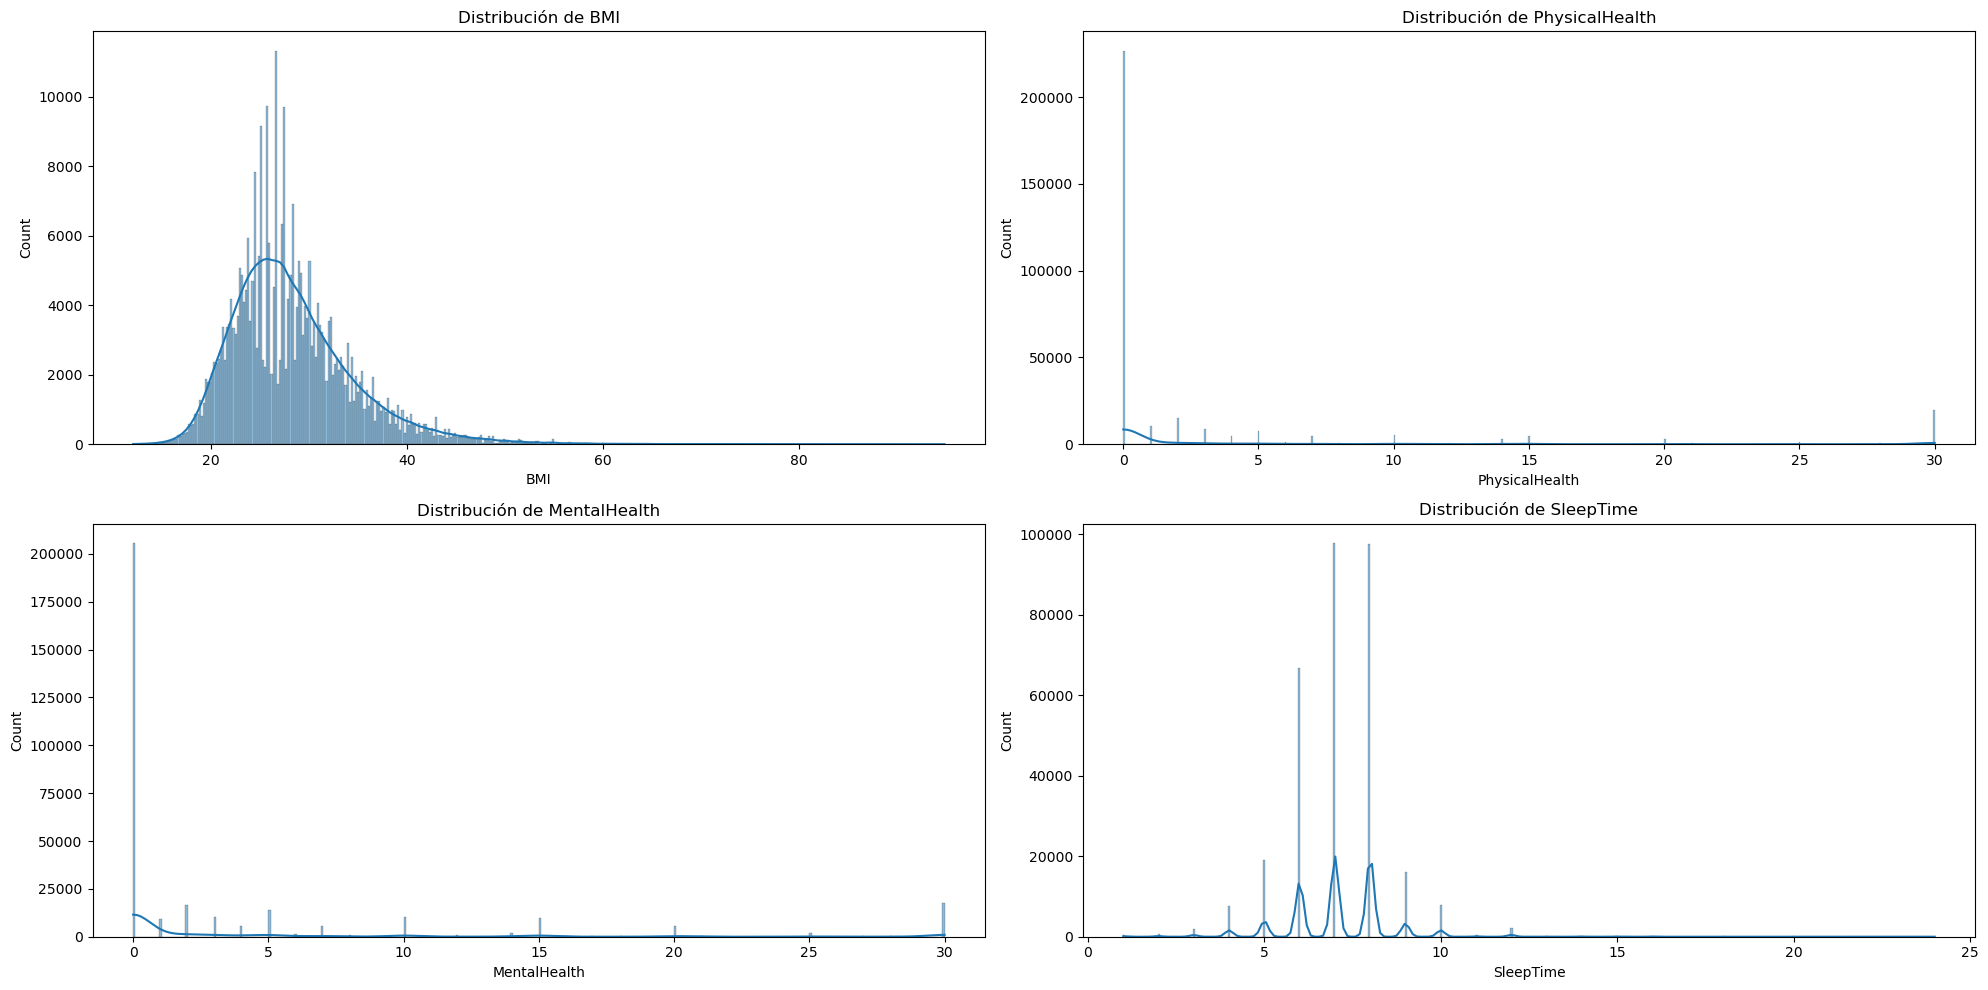

In [66]:
# Distribución de las variables numéricas

columnas_numericas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize = (20, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde = True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

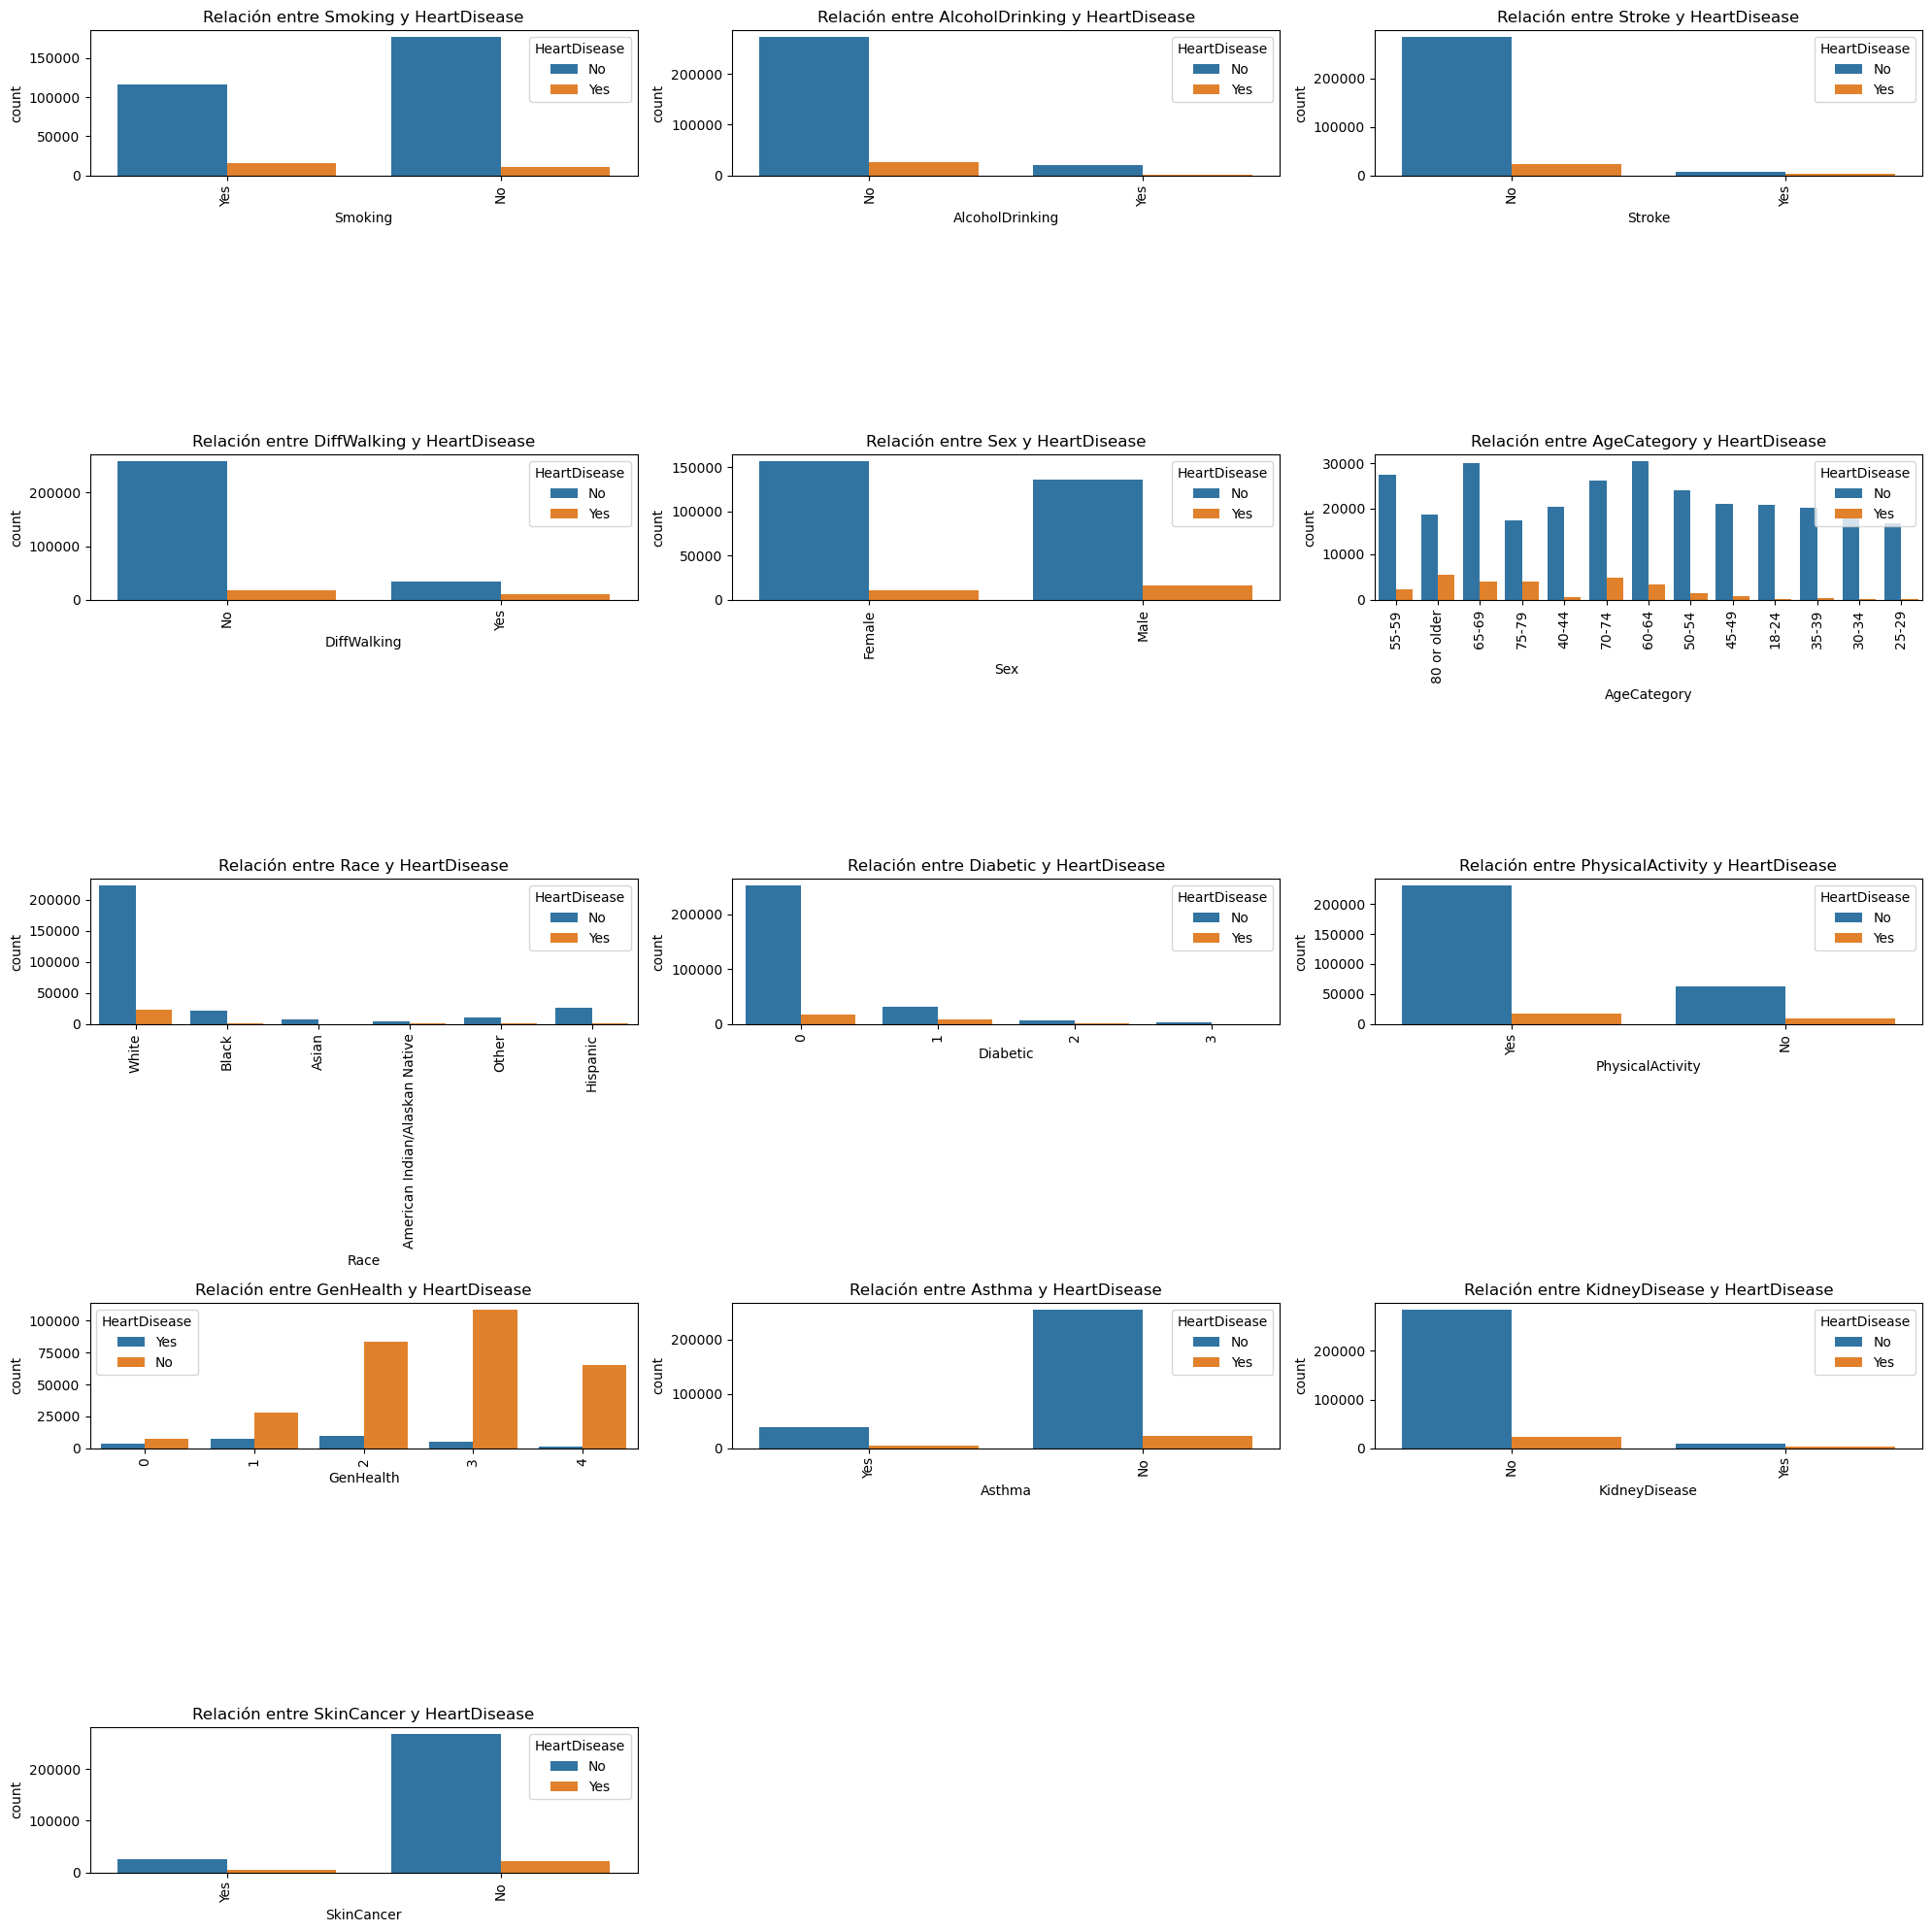

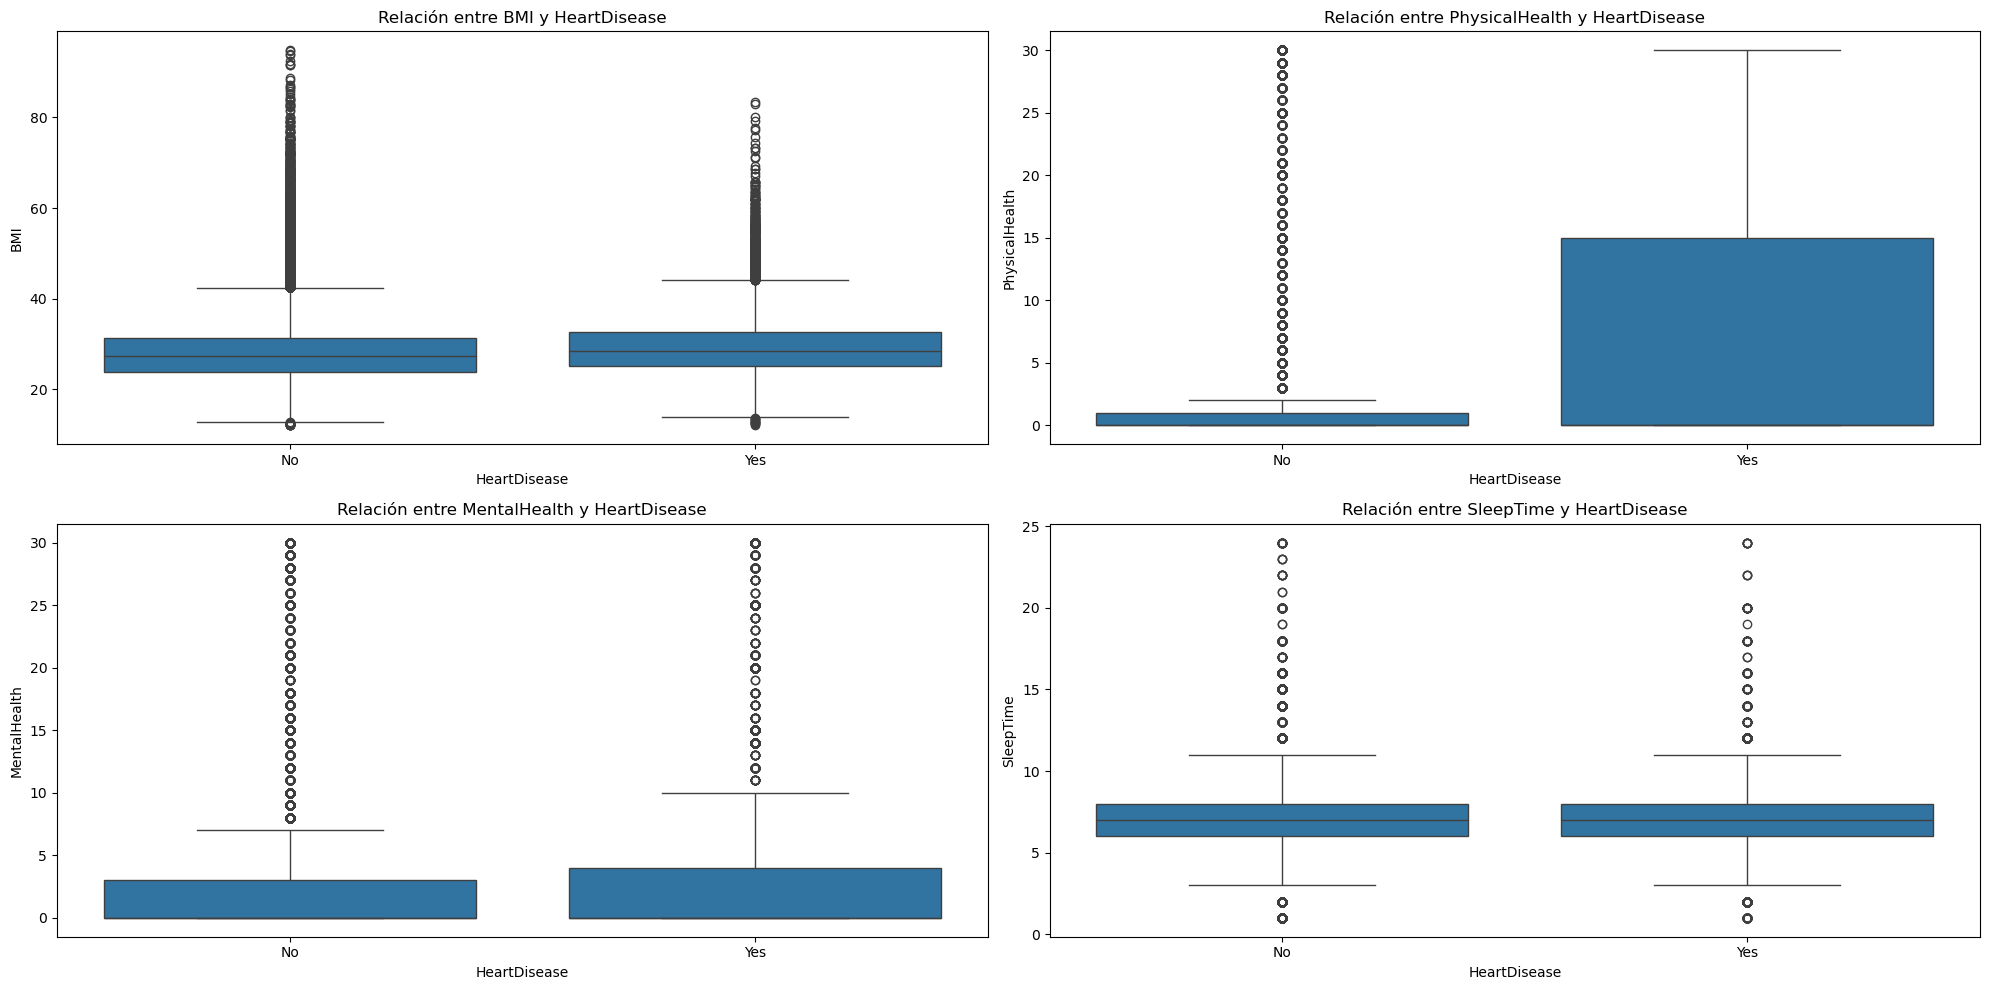

In [67]:
# Relación entre variables

# Relación entre variables categóricas y HeartDisease
plt.figure(figsize = (20, 20))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x = col, hue = 'HeartDisease', data = df)
    plt.title(f'Relación entre {col} y HeartDisease')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# Relación entre variables numéricas y HeartDisease
plt.figure(figsize = (20, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = 'HeartDisease', y = col, data = df)
    plt.title(f'Relación entre {col} y HeartDisease')
plt.tight_layout()
plt.show()

# 04. Modelos, Métricas y Métodos de Validación

En esta etapa vamos a implementar los modelos de Machine Learning que se adecuen mejor al problema y como consecuencia las métricas de cada modelo.

*  Primero vamos a entrenar diferentes modelos y calcular todas las métricas y dependiendo de la naturaleza del problema vamos a seleccionar el modelo que mejor desempeño tiene, utilizando los 3 métodos de validación.

*  Luego vamos a hacerle "Tuning" con GridSearchCV para encontrar los mejores parámetros para el modelo.

En caso de estar haciendo un Algoritmo Genético o un Recomendador el objetivo de esta parte deberá ser el de mejorar el modelo para que sea más eficiente.

In [68]:
# 2024-07-01 AGM Subo la parte de ML :) <<-- todos los comentarios son eliminables luego ;)

# 2024-07-01 AGM Vemos cinco filas al azar.

df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
294303,No,25.04,No,No,No,0,12,No,Male,40-44,White,0,Yes,3,6,No,No,No
104557,No,29.03,Yes,No,No,30,30,Yes,Male,70-74,White,1,Yes,1,8,No,No,Yes
36297,No,31.89,No,No,No,0,0,No,Female,45-49,Black,0,Yes,4,7,No,No,No
187962,No,29.65,No,No,No,2,0,No,Male,45-49,White,0,Yes,4,7,No,No,No
3271,No,23.63,No,No,No,5,0,No,Male,70-74,White,0,Yes,3,10,No,No,No


In [69]:
# 2024-07-01 AGM Esta parte es para dejar el dataframe listo para ML, luego movemos esta parte. Lo que quiero para entrenar los modelos es dejar el dataframe con las columnas Yes/No a 1/0, y hacer OneHotEncoding para las que tienen varios valores.

# 2024-07-01 AGM Lo primero, hacemos una copia del dataframe.

df_ml = df.copy()
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
31155,No,30.11,No,No,No,0,1,No,Female,60-64,White,2,Yes,3,7,No,No,No
231973,No,34.01,Yes,No,No,0,0,No,Female,80 or older,White,0,Yes,2,8,No,No,No
216943,No,28.06,Yes,No,No,0,0,Yes,Male,60-64,White,0,No,3,8,No,No,No
299156,No,25.06,Yes,No,No,1,0,No,Male,65-69,White,0,Yes,3,7,No,No,No
83171,No,22.96,No,No,No,30,0,No,Male,60-64,White,0,No,3,6,No,No,No


In [70]:
# 2024-07-01 AGM Modificamos las columnas binarias a 0´s y 1´s y la columna Sexla tratamos por separado.

columns_yes_no = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns_yes_no:
    df_ml[column] = df_ml[column].map({'Yes':1, 'No':0})

df_ml['Sex'] = df_ml['Sex'].map({'Male':0, 'Female':1})

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
92328,0,24.03,0,0,0,0,0,0,1,70-74,White,0,1,4,7,0,0,0
29935,0,33.23,0,0,0,0,0,0,0,55-59,White,0,1,4,8,0,0,0
114988,0,32.81,1,0,0,0,0,0,1,65-69,Black,0,1,3,7,1,0,0
24539,0,29.05,1,1,0,2,0,0,1,30-34,White,0,0,2,6,0,0,0
138178,0,28.19,1,0,0,0,0,0,1,60-64,White,0,1,4,7,0,0,1


In [71]:
# 2024-07-01 AGM Modificamos ahora las columnas categóricas haciendo OneHotEncoding.

columns_to_encode = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

# 2024-07-01 AGM Inicializar el OneHotEncoder. Sparse_output = false genera una matriz que se puede convertir a dataframe.
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)

# 2024-07-01 AGM Crea tabla con todas las columnas que se han codificado.
encoded_data = one_hot_encoder.fit_transform(df_ml[columns_to_encode])

# 2024-07-01 AGM Convertimos dataframe del encoded_data y asignamos nombres a las columnas.
df_encoded_data = pd.DataFrame(encoded_data, columns = one_hot_encoder.get_feature_names_out(columns_to_encode))
df_encoded_data

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319792,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
df_encoded_data = df_encoded_data.astype(int)
df_encoded_data.sample(5)

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
111711,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
207875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
165834,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
139091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
137703,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [73]:
# 2024-07-01 AGM Eliminamos las columnas codificadas.

df_ml.drop(columns = columns_to_encode, inplace = True)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [74]:
# 2024-07-01 AGM Vamos a unir ambos dataframes. Importante: Al usar concat hay que especificar si queremos que concatene los dataframes verticalmente u horizontalmente. Para concatenar horizontalmente hay que usar axis = 1, para verticalmente, axis = 0. Lo descubrí tras varios fallos y ChatGPT me ayudó :P

df_ml = pd.concat([df_ml, df_encoded_data], axis = 1)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_0', 'Diabetic_1',
       'Diabetic_2', 'Diabetic_3', 'GenHealth_0', 'GenHealth_1', 'GenHealth_2',
       'GenHealth_3', 'GenHealth_4'],
      dtype='object')

In [75]:
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  int64  
 6   MentalHealth                         319795 non-null  int64  
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   PhysicalActivity                     319795 non-null  int64  
 10  SleepTime                            319795 non-null  int64  
 11  Asthma       

In [76]:
df_ml.isna().sum()

HeartDisease                           0
BMI                                    0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
PhysicalHealth                         0
MentalHealth                           0
DiffWalking                            0
Sex                                    0
PhysicalActivity                       0
SleepTime                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
AgeCategory_18-24                      0
AgeCategory_25-29                      0
AgeCategory_30-34                      0
AgeCategory_35-39                      0
AgeCategory_40-44                      0
AgeCategory_45-49                      0
AgeCategory_50-54                      0
AgeCategory_55-59                      0
AgeCategory_60-64                      0
AgeCategory_65-69                      0
AgeCategory_70-7

In [77]:
# 2024-07-01 AGM De alguna manera se nos ha colado algún nulo. Me los cargo para poder hacer rápido esto, pero habrá que echar un vistazo.

df_ml.dropna(inplace = True)

In [78]:
# 2024-07-01 AGM Convertimos de Float a int todas las columnas excepto BMI.

for column in df_ml.columns:
    if column != 'BMI':
        df_ml[column] = df_ml[column].astype(int)

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
170438,0,37.07,1,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
129540,0,22.05,0,0,0,1,1,0,0,1,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
186197,0,31.19,0,1,0,0,19,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
203224,0,19.14,0,0,0,6,10,0,1,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
125780,0,28.35,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [79]:
# 2024-07-01 AGM Variable a predecir (Target): HeartDisease

df_ml_copy = df_ml.copy()

X = df_ml_copy.drop('HeartDisease', axis = 1)
y = df_ml_copy['HeartDisease']

In [80]:
# 2024-07-01 AGM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [81]:
# 2024-07-01 AGM Usamos de normalizador el MinMaxScaler. Se puede probar con varios.

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# 2024-07-01 AGM Modelos candidatos: añadir mas opciones luego.

candidate_models = {'Regresión logística': LogisticRegression(max_iter = 1000),
                    'Árbol de decisión': DecisionTreeClassifier(),
                    'Random forest': RandomForestClassifier(),
                    'Gradient boosting': GradientBoostingClassifier(),
                    'Adaboost': AdaBoostClassifier(),
                    'KNN': KNeighborsClassifier(),
                    'Gaussian NB': GaussianNB(),
                    'LDA': LinearDiscriminantAnalysis(),
                    'QDA': QuadraticDiscriminantAnalysis()}

# Quito 'SVM': SVC() del diccionario porque tarda mucho (222 minutos).
for name, model in candidate_models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f'{name}: \naccuracy: {accuracy}')
    print(confusion_matrix(y_test, y_predict))

Regresión logística: 
accuracy: 0.9138666958520302
[[57888   479]
 [ 5030   562]]
Árbol de decisión: 
accuracy: 0.8635532137775762
[[53828  4539]
 [ 4188  1404]]


KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73     58367
           1       0.16      0.83      0.27      5592

    accuracy                           0.61     63959
   macro avg       0.57      0.71      0.50     63959
weighted avg       0.90      0.61      0.69     63959

[[34113 24254]
 [  966  4626]]


In [ ]:
# Tuning de hiperparámetros con GridSearchCV

parametros = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = parametros, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros para Random Forest:", grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_
y_pred_mejor = mejor_modelo.predict(X_test)

print("Resultados Random Forest optimizado con GridSearchCV:")
print(classification_report(y_test, y_pred_mejor))
print(confusion_matrix(y_test, y_pred_mejor))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=  34.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=  35.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=  35.9s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100; total time=  34.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time= 1.2min
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100; total time=  36.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=100; total time=  35.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time= 1.3min
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time= 1.3min
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=  50.0s

KeyboardInterrupt: 

# 05. Resultados y Conclusiones

Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

In [ ]:
print("Resultados del modelo optimizado con GridSearchCV:")
print(classification_report(y_test, y_pred_mejor))
print("Matriz de confusión del modelo optimizado:")
print(confusion_matrix(y_test, y_pred_mejor))

# 06. Storytelling

Como último vamos a hacer una pequeña presentación de principio a fin sobre el proyecto, esta presentación puede incluir:

*  Motivaciones del proyecto.

*  Alcance del proyecto.

*  Herramientas o tecnologías usadas.

*  Desafíos en cada parte del proceso.

*  Resolución de cada desafío o problema.

*  Un esquema de lo que fue el proyecto.

*  Visualizaciones y resultados.

Todos los miembros del equipo deben participar, no es obligatorio hacer una presentación o material audiovisual. Esta parte no será evaluada.